In [176]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
import warnings
warnings.filterwarnings('ignore')  # supress warnings
sns.set_style('whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

import pickle 

# csv datasının yüklenmesi
data1 = pd.read_csv("fma-rock-vs-hiphop.csv")


# json datasının yüklenmesi
import json
with open('echonest-metrics.json') as json_file:
    data2 = json.load(json_file)

In [177]:
tracks = data1
echonest_metrics = pd.DataFrame(data2)
echo_tracks = pd.merge(data1, echonest_metrics, on='track_id')

del tracks 
del echonest_metrics
del data1 
del data2

x = echo_tracks.drop(["genre_top", "genres", "genres_all"], axis=1)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 26 columns):
track_id            4802 non-null int64
bit_rate            4802 non-null int64
comments            4802 non-null int64
composer            106 non-null object
date_created        4802 non-null object
date_recorded       1234 non-null object
duration            4802 non-null int64
favorites           4802 non-null int64
information         334 non-null object
interest            4802 non-null int64
language_code       2599 non-null object
license             4789 non-null object
listens             4802 non-null int64
lyricist            13 non-null object
number              4802 non-null int64
publisher           27 non-null object
tags                4802 non-null object
title               4802 non-null object
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
l

In [131]:
x = echo_tracks.drop(["genre_top", "genres", "genres_all", "composer", "date_created", "date_recorded", "information",
                      "interest", "language_code", "license", "lyricist", "publisher", "tags", "title", "track_id",], axis=1)

print(x.info())

y = pd.DataFrame(echo_tracks.genre_top.values, columns = ['genre_top'])
y["genre_top"] = [1 if i == 'Rock' else 0 for i in y.genre_top]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 14 columns):
bit_rate            4802 non-null int64
comments            4802 non-null int64
duration            4802 non-null int64
favorites           4802 non-null int64
listens             4802 non-null int64
number              4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(8), int64(6)
memory usage: 562.7 KB
None


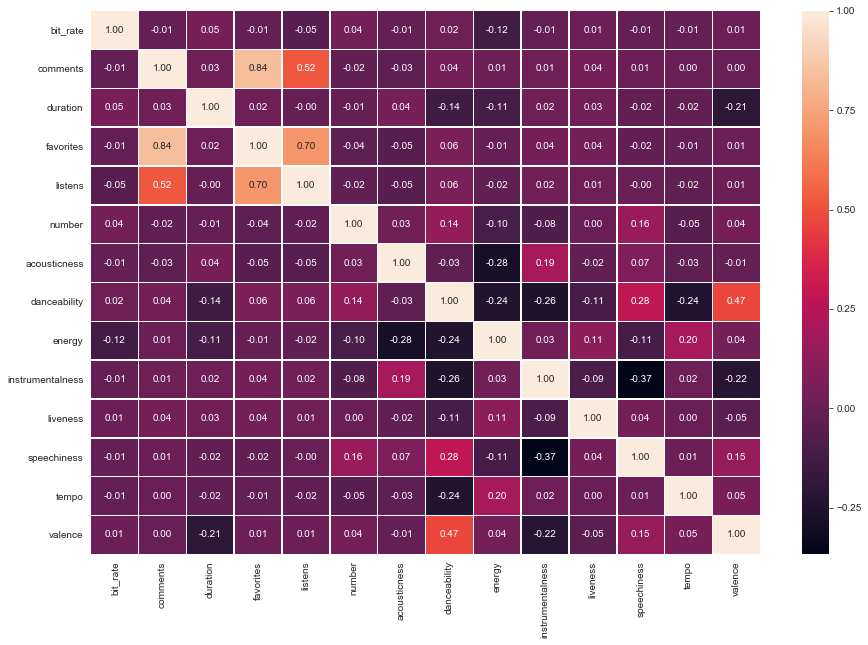

In [132]:
# Drop correlated features

# korelasyon görselleştirme
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

# korele olanları drop etme
corr_matrix = x.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [133]:
print("drop edilecek degiskenler:")
print(to_drop)
x.drop(labels = to_drop, axis=1, inplace=True)

drop edilecek degiskenler:
['favorites', 'listens']


In [134]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 12 columns):
bit_rate            4802 non-null int64
comments            4802 non-null int64
duration            4802 non-null int64
number              4802 non-null int64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(8), int64(4)
memory usage: 487.7 KB
None


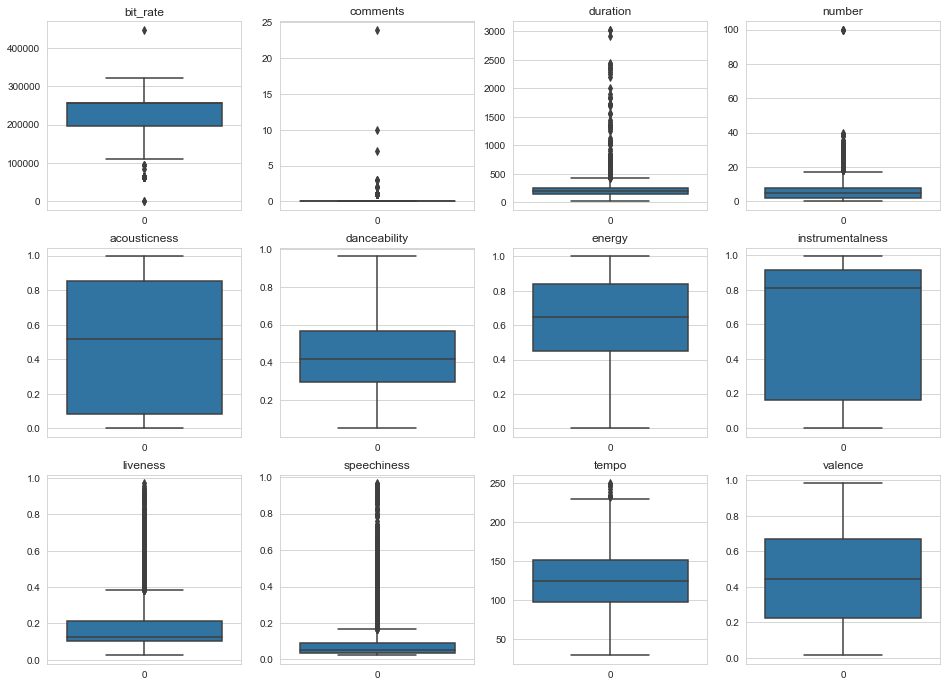

In [135]:
figure = plt.figure(figsize=(16,16))
plt.subplot2grid((4,4),(0,0))
plt.title("bit_rate")
sns.boxplot(data=x.bit_rate)

plt.subplot2grid((4,4),(0,1))
plt.title("comments")
sns.boxplot(data=x.comments)

plt.subplot2grid((4,4),(0,2))
plt.title("duration")
sns.boxplot(data=x.duration)

plt.subplot2grid((4,4),(0,3))
plt.title("number")
sns.boxplot(data=x.number)

plt.subplot2grid((4,4),(1,0))
plt.title("acousticness")
sns.boxplot(data=x.acousticness)

plt.subplot2grid((4,4),(1,1))
plt.title("danceability")
sns.boxplot(data=x.danceability)

plt.subplot2grid((4,4),(1,2))
plt.title("energy")
sns.boxplot(data=x.energy)

plt.subplot2grid((4,4),(1,3))
plt.title("instrumentalness")
sns.boxplot(data=x.instrumentalness)

plt.subplot2grid((4,4),(2,0))
plt.title("liveness")
sns.boxplot(data=x.liveness)

plt.subplot2grid((4,4),(2,1))
plt.title("speechiness")
sns.boxplot(data=x.speechiness)

plt.subplot2grid((4,4),(2,2))
plt.title("tempo")
sns.boxplot(data=x.tempo)

plt.subplot2grid((4,4),(2,3))
plt.title("valence")
sns.boxplot(data=x.valence)
plt.show()

In [136]:
x.describe()

,bit_rate,comments,duration,number,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4802.000000,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,246125.992503,0.027697,229.256768,5.757185,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,56789.007268,0.418614,190.619206,5.661765,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,-1.000000,0.000000,18.000000,0.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,197678.750000,0.000000,144.000000,2.000000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,256000.000000,0.000000,198.000000,5.000000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,256000.000000,0.000000,261.000000,8.000000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,448000.000000,24.000000,3033.000000,100.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


In [137]:
for c in range(len(list(x.columns))):
    q1 = x.iloc[:, c].quantile(0.25)
    q3 = x.iloc[:, c].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)
    
    x.iloc[:, c] = [lower_bound if i < lower_bound else i if lower_bound <= i <= upper_bound else upper_bound for i in x.iloc[:, c]]

del c 
del iqr 
del q1 
del q3 
del upper_bound 
del lower_bound

x.describe()

,bit_rate,comments,duration,number,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4802.0,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,246664.504712,0.0,211.914931,5.492711,4.870600e-01,0.436556,0.625126,0.604096,0.170128,0.070812,126.667860,0.453413
std,55112.673085,0.0,94.797018,4.255686,3.681396e-01,0.183502,0.244051,0.376487,0.099269,0.046916,33.936443,0.266632
min,110196.875000,0.0,18.000000,0.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,197678.750000,0.0,144.000000,2.000000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,256000.000000,0.0,198.000000,5.000000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,256000.000000,0.0,261.000000,8.000000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,343481.875000,0.0,436.500000,17.000000,9.957965e-01,0.961871,0.999768,0.993134,0.381799,0.165381,231.623875,0.983649


In [138]:
x.drop(["comments"], axis=1, inplace=True)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 11 columns):
bit_rate            4802 non-null float64
duration            4802 non-null float64
number              4802 non-null float64
acousticness        4802 non-null float64
danceability        4802 non-null float64
energy              4802 non-null float64
instrumentalness    4802 non-null float64
liveness            4802 non-null float64
speechiness         4802 non-null float64
tempo               4802 non-null float64
valence             4802 non-null float64
dtypes: float64(11)
memory usage: 610.2 KB
None


PCA SONRASI DATAN:
principal component - second component-...
variance ratio: [0.18422685 0.15962011 0.14740203 0.11548201 0.09673073 0.08130933
 0.06604229 0.05784674]
Ne kadar bilginin tutulduğu
sum: 0.9086600826966393



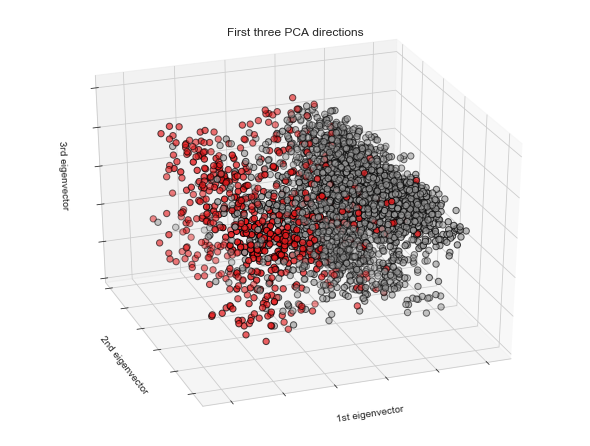

Text(0.5, 0, 'Principal Component #')

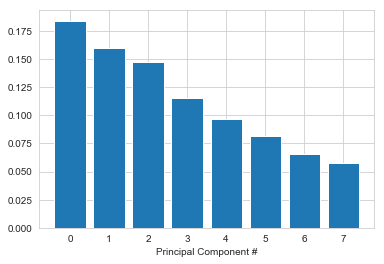

In [141]:
# normalization ile feature'ları ölçeklendirme
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
r_scaled_data = r_scaler.fit_transform(x)
r_scaled_data = pd.DataFrame(r_scaled_data, columns=x.columns)

pca = PCA(n_components = 8)
x_pca = pca.fit_transform(r_scaled_data)
print("PCA SONRASI DATAN:")
print("principal component - second component-...")
print("variance ratio:", pca.explained_variance_ratio_)
print("Ne kadar bilginin tutulduğu")
print("sum:", sum(pca.explained_variance_ratio_))
print("")

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x_train)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train.genre_top,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component #')


In [154]:
x_train_v1, x_test_v1, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=100)

# 1 - Logistic Regression with pca data

In [155]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
x_train = r_scaler.fit_transform(x_train_v1)
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = r_scaler.fit_transform(x_test_v1)
x_test = pd.DataFrame(x_test, columns=x.columns)

pca = PCA(n_components = 8)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2'] }
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, scoring= 'accuracy', cv=5)
logreg_cv.fit(x_train, y_train)
print("")
print("---------------------     LOGISTIC REGRESSION     -------------------")
print("best parametreler(grid search ile):", logreg_cv.best_params_)
print("best score(grid search ile):", logreg_cv.best_score_)
logreg = LogisticRegression(C=logreg_cv.best_params_['C'], penalty=logreg_cv.best_params_['penalty'])
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print("coefficients:",logreg.coef_)
print("b0(constant):",logreg.intercept_)
print("iterasyon:",logreg.n_iter_)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
logreg_acc_score = round(logreg.score(x_test, y_test) * 100, 2)
print("Accuracy Score:", logreg_acc_score)
logreg_precision = precision_score(y_test, y_pred, average=None)
print("Precision (TP/(TP+FP)):", logreg_precision)
logreg_recall = recall_score(y_test, y_pred, average=None)
print("Recall, TPR (TP/(TP+FN)):", logreg_recall)
logreg_f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:",logreg_f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob_logreg = logreg.predict_proba(x_test)
pred_prob = pd.DataFrame(data=y_pred_prob_logreg, columns=["prob0_logreg","prob1_logreg"])
pred_y = pd.DataFrame(data=y_pred, columns=["class_logreg"])
test_score_y = pd.DataFrame(data=y_test, columns=['genre_top'])
test_score = pd.concat([test_score_y, pred_prob["prob1_logreg"], pred_y], axis=1)
print("ROC_AUC Score:")
roc_score_logistic = roc_auc_score(y_test, y_pred)
print(roc_score_logistic)


---------------------     LOGISTIC REGRESSION     -------------------
best parametreler(grid search ile): {'C': 0.1, 'penalty': 'l2'}
best score(grid search ile): 0.905859483476812
coefficients: [[-1.88218195  0.35063003 -0.25039521 -0.21057441  0.35796521  0.30216344
   0.44048848  0.40190172]]
b0(constant): [2.28819624]
iterasyon: [6]
Confusion Matrix:
[[138  87]
 [ 54 922]]
Accuracy Score: 88.26
Precision (TP/(TP+FP)): [0.71875    0.91377602]
Recall, TPR (TP/(TP+FN)): [0.61333333 0.94467213]
F1 Score: [0.6618705  0.92896725]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       225
           1       0.91      0.94      0.93       976

   micro avg       0.88      0.88      0.88      1201
   macro avg       0.82      0.78      0.80      1201
weighted avg       0.88      0.88      0.88      1201

ROC_AUC Score:
0.7790027322404371


# 2 - Random Forest with r-scaled data

In [158]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
x_train = r_scaler.fit_transform(x_train_v1)
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = r_scaler.fit_transform(x_test_v1)
x_test = pd.DataFrame(x_test, columns=x.columns)

param_grid = {'n_estimators': np.arange(1, 100), 'max_depth': np.arange(1, 10)}
random_forest_r = RandomForestClassifier()
random_forest_r_cv = GridSearchCV(random_forest_r, param_grid, scoring= 'accuracy', cv=5)
random_forest_r_cv.fit(x_train, y_train)
print("")
print("-----------------------     RANDOM FOREST      ----------------------")
print("best parametreler(grid search ile):", random_forest_r_cv.best_params_)
print("best score(grid search ile):", random_forest_r_cv.best_score_)

random_forest_r = RandomForestClassifier(n_estimators=random_forest_r_cv.best_params_['n_estimators'], max_depth=random_forest_r_cv.best_params_['max_depth'], max_features="sqrt")
random_forest_r.fit(x_train, y_train)
y_pred = random_forest_r.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

random_forest_r_acc_score = round(random_forest_r.score(x_test, y_test) * 100, 2)
print("Accuracy Score:", random_forest_r_acc_score)
random_forest_r_precision = precision_score(y_test, y_pred, average=None)
print("Precision (TP/(TP+FP)):", random_forest_r_precision)
random_forest_r_recall = recall_score(y_test, y_pred, average=None)
print("Recall, TPR (TP/(TP+FN)):", random_forest_r_recall)
random_forest_r_f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:",random_forest_r_f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob_rforest_r = random_forest_r.predict_proba(x_test)
pred_prob = pd.DataFrame(data=y_pred_prob_rforest_r, columns=["prob0_rforest","prob1_rforest"])
pred_y = pd.DataFrame(data=y_pred, columns=["class_rforest"])
test_score = pd.concat([test_score, pred_prob["prob1_rforest"], pred_y], axis=1)

roc_score_rforest_r = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_rforest_r)
# print("MSE(mean squared error):", np.mean((y_pred-y_test)**2))
# print("RMSE(root mean squared error):", np.sqrt(np.mean((y_pred-y_test)**2)))
print("The number of features when fit is performed:", random_forest_r.n_features_)
print("The number of outputs when fit is performed:", random_forest_r.n_outputs_)

features = pd.DataFrame(data=x.columns)

importance_rforest_r = pd.DataFrame(data=random_forest_r.feature_importances_, columns=['importance'])
importance_rforest_r = pd.concat([features, importance_rforest_r], axis=1)
importance_rforest_r = importance_rforest_r.sort_values(by=['importance'], ascending=False)
print("Importances of Feature:")
print(importance_rforest_r) 


-----------------------     RANDOM FOREST      ----------------------
best parametreler(grid search ile): {'max_depth': 8, 'n_estimators': 39}
best score(grid search ile): 0.9389058594834768
Confusion Matrix:
[[149  76]
 [ 20 956]]
Accuracy Score: 92.01
Precision (TP/(TP+FP)): [0.8816568  0.92635659]
Recall, TPR (TP/(TP+FN)): [0.66222222 0.9795082 ]
F1 Score: [0.75634518 0.95219124]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       225
           1       0.93      0.98      0.95       976

   micro avg       0.92      0.92      0.92      1201
   macro avg       0.90      0.82      0.85      1201
weighted avg       0.92      0.92      0.92      1201

ROC_AUC Score: 0.820865209471767
The number of features when fit is performed: 11
The number of outputs when fit is performed: 1
Importances of Feature:
                   0  importance
8        speechiness    0.337038
4       danceability    0.192792
6   instrum

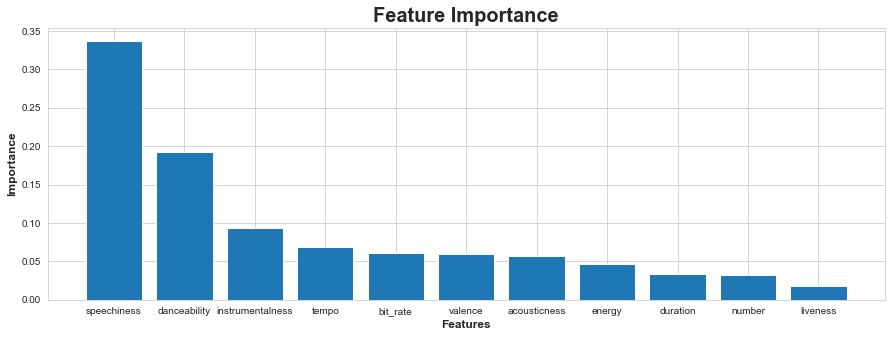

In [210]:
plt.figure(figsize=(15, 5))
plt.title('Feature Importance', fontweight="bold", fontsize=20)
plt.bar(importance_rforest_r[0], importance_rforest_r["importance"])
plt.xlabel("Features", fontweight="bold", fontsize=12)
plt.ylabel("Importance", fontweight="bold", fontsize=12)
plt.show()

# 3 - Random Forest with n-scaled data

In [160]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
x_train = n_scaler.fit_transform(x_train_v1)
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = n_scaler.fit_transform(x_test_v1)
x_test = pd.DataFrame(x_test, columns=x.columns)

param_grid = {'n_estimators': np.arange(1, 100), 'max_depth': np.arange(1, 10)}
random_forest_n = RandomForestClassifier()
random_forest_n_cv = GridSearchCV(random_forest_n, param_grid, scoring= 'accuracy', cv=5)
random_forest_n_cv.fit(x_train, y_train)
print("")
print("-----------------------     RANDOM FOREST      ----------------------")
print("best parametreler(grid search ile):", random_forest_n_cv.best_params_)
print("best score(grid search ile):", random_forest_n_cv.best_score_)

random_forest_n = RandomForestClassifier(n_estimators=random_forest_n_cv.best_params_['n_estimators'], max_depth=random_forest_n_cv.best_params_['max_depth'], max_features="sqrt")
random_forest_n.fit(x_train, y_train)
y_pred = random_forest_n.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

random_forest_n_acc_score = round(random_forest_n.score(x_test, y_test) * 100, 2)
print("Accuracy Score:", random_forest_n_acc_score)
random_forest_n_precision = precision_score(y_test, y_pred, average=None)
print("Precision (TP/(TP+FP)):", random_forest_n_precision)
random_forest_n_recall = recall_score(y_test, y_pred, average=None)
print("Recall, TPR (TP/(TP+FN)):", random_forest_n_recall)
random_forest_n_f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:",random_forest_n_f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob_rforest_n = random_forest_n.predict_proba(x_test)
pred_prob = pd.DataFrame(data=y_pred_prob_rforest_n, columns=["prob0_rforest_n","prob1_rforest_n"])
pred_y = pd.DataFrame(data=y_pred, columns=["class_rforest_n"])
test_score = pd.concat([test_score, pred_prob["prob1_rforest_n"], pred_y], axis=1)

roc_score_rforest_n = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_rforest_n)
# print("MSE(mean squared error):", np.mean((y_pred-y_test)**2))
# print("RMSE(root mean squared error):", np.sqrt(np.mean((y_pred-y_test)**2)))
print("The number of features when fit is performed:", random_forest_n.n_features_)
print("The number of outputs when fit is performed:", random_forest_n.n_outputs_)

features = pd.DataFrame(data=x.columns)

importance_rforest_n = pd.DataFrame(data=random_forest_n.feature_importances_, columns=['importance'])
importance_rforest_n = pd.concat([features, importance_rforest_n], axis=1)
importance_rforest_n = importance_rforest_n.sort_values(by=['importance'], ascending=False)
print("Importances of Feature:")
print(importance_rforest_n) 


-----------------------     RANDOM FOREST      ----------------------
best parametreler(grid search ile): {'max_depth': 8, 'n_estimators': 27}
best score(grid search ile): 0.9375173562899195
Confusion Matrix:
[[152  73]
 [ 34 942]]
Accuracy Score: 91.09
Precision (TP/(TP+FP)): [0.8172043  0.92807882]
Recall, TPR (TP/(TP+FN)): [0.67555556 0.96516393]
F1 Score: [0.73965937 0.94625816]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       225
           1       0.93      0.97      0.95       976

   micro avg       0.91      0.91      0.91      1201
   macro avg       0.87      0.82      0.84      1201
weighted avg       0.91      0.91      0.91      1201

ROC_AUC Score: 0.8203597449908925
The number of features when fit is performed: 11
The number of outputs when fit is performed: 1
Importances of Feature:
                   0  importance
8        speechiness    0.306254
4       danceability    0.229794
6   instru

# 4 - KNN with r-scaled data

In [161]:
r_scaler = RobustScaler()
x_train = r_scaler.fit_transform(x_train_v1)
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = r_scaler.fit_transform(x_test_v1)
x_test = pd.DataFrame(x_test, columns=x.columns)

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, scoring= 'accuracy', cv=5)
knn_cv.fit(x_train, y_train)
print("")
print("---------------------------     KNN      ------------------------------")
print("best parametreler(grid search ile):", knn_cv.best_params_)
print("best score(grid search ile):", knn_cv.best_score_)

knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
knn_acc_score = round(knn.score(x_test, y_test) * 100, 2)
print("Accuracy Score:", knn_acc_score)
knn_precision = precision_score(y_test, y_pred, average=None)
print("Precision (TP/(TP+FP)):", knn_precision)
knn_recall = recall_score(y_test, y_pred, average=None)
print("Recall, TPR (TP/(TP+FN)):", knn_recall)
knn_f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:",knn_f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob_knn =knn.predict_proba(x_test)
pred_prob = pd.DataFrame(data=y_pred_prob_knn, columns=["prob0_knn","prob1_knn"])
pred_y = pd.DataFrame(data=y_pred, columns=["class_knn"])
test_score = pd.concat([test_score, pred_prob["prob1_knn"], pred_y], axis=1)

roc_score_knn = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_knn)


---------------------------     KNN      ------------------------------
best parametreler(grid search ile): {'n_neighbors': 9}
best score(grid search ile): 0.9275201332963066
Confusion Matrix:
[[162  63]
 [ 38 938]]
Accuracy Score: 91.59
Precision (TP/(TP+FP)): [0.81       0.93706294]
Recall, TPR (TP/(TP+FN)): [0.72       0.96106557]
F1 Score: [0.76235294 0.94891249]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       225
           1       0.94      0.96      0.95       976

   micro avg       0.92      0.92      0.92      1201
   macro avg       0.87      0.84      0.86      1201
weighted avg       0.91      0.92      0.91      1201

ROC_AUC Score: 0.8405327868852459


# 5 - SVM (rbf) with s-scaled data

In [166]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train_v1)
x_train = pd.DataFrame(x_train, columns=x.columns)

x_test = s_scaler.fit_transform(x_test_v1)
x_test = pd.DataFrame(x_test, columns=x.columns)

param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000, 10000], 'gamma': [1e-3, 1e-4] }
svm_rbf = SVC(kernel='rbf')
svm_rbf_cv = GridSearchCV(svm_rbf, param_grid, scoring= 'accuracy', cv=5)
svm_rbf_cv.fit(x_train, y_train)
print("")
print("-----------------------   SVM (kernel: rbf)    -----------------------")
print("best parametreler(grid search ile):", svm_rbf_cv.best_params_)
print("best score(grid search ile):", svm_rbf_cv.best_score_)

svm_rbf = SVC(kernel='rbf', C=svm_rbf_cv.best_params_['C'], gamma=svm_rbf_cv.best_params_['gamma'], probability=True)
svm_rbf.fit(x_train, y_train)

y_pred = svm_rbf.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
svm_rbf_acc_score = round(svm_rbf.score(x_test, y_test) * 100, 2)
print("Accuracy Score:", svm_rbf_acc_score)
svm_rbf_precision = precision_score(y_test, y_pred, average=None)
print("Precision (TP/(TP+FP)):", svm_rbf_precision)
svm_rbf_recall = recall_score(y_test, y_pred, average=None)
print("Recall, TPR (TP/(TP+FN)):", svm_rbf_recall)
svm_rbf_f1 = f1_score(y_test, y_pred, average=None)
print("F1 Score:",svm_rbf_f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_prob_svm_rbf = svm_rbf.predict_proba(x_test)
pred_prob = pd.DataFrame(data=y_pred_prob_svm_rbf, columns=["prob0_svm_rbf","prob1_svm_rbf"])
pred_y = pd.DataFrame(data=y_pred, columns=["class_svm_rbf"])
test_score = pd.concat([test_score, pred_prob["prob1_svm_rbf"], pred_y], axis=1)

roc_score_svm_rbf = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", roc_score_svm_rbf)
print("Support vectors:", svm_rbf.support_vectors_)
print("Number of support vectors for each class:", svm_rbf.n_support_)
print("Constants in decision function:", svm_rbf.intercept_)
print("Fit Status (0 if correctly fitted, 1 otherwise (will raise warning)):", svm_rbf.fit_status_)


-----------------------   SVM (kernel: rbf)    -----------------------
best parametreler(grid search ile): {'C': 1000, 'gamma': 0.001}
best score(grid search ile): 0.9252985281866148
Confusion Matrix:
[[158  67]
 [ 38 938]]
Accuracy Score: 91.26
Precision (TP/(TP+FP)): [0.80612245 0.93333333]
Recall, TPR (TP/(TP+FN)): [0.70222222 0.96106557]
F1 Score: [0.75059382 0.94699647]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       225
           1       0.93      0.96      0.95       976

   micro avg       0.91      0.91      0.91      1201
   macro avg       0.87      0.83      0.85      1201
weighted avg       0.91      0.91      0.91      1201

ROC_AUC Score: 0.8316438979963571
Support vectors: [[-0.98285457 -0.75949955  1.76939242 ...  2.01563718 -2.10002454
   0.76136243]
 [-1.56135888 -0.25382671 -1.28539524 ...  2.01563718  1.19617685
   0.26296726]
 [-0.98285457  0.29398553  0.12450676 ... -0.79077301 -1.0

# Model Comparison

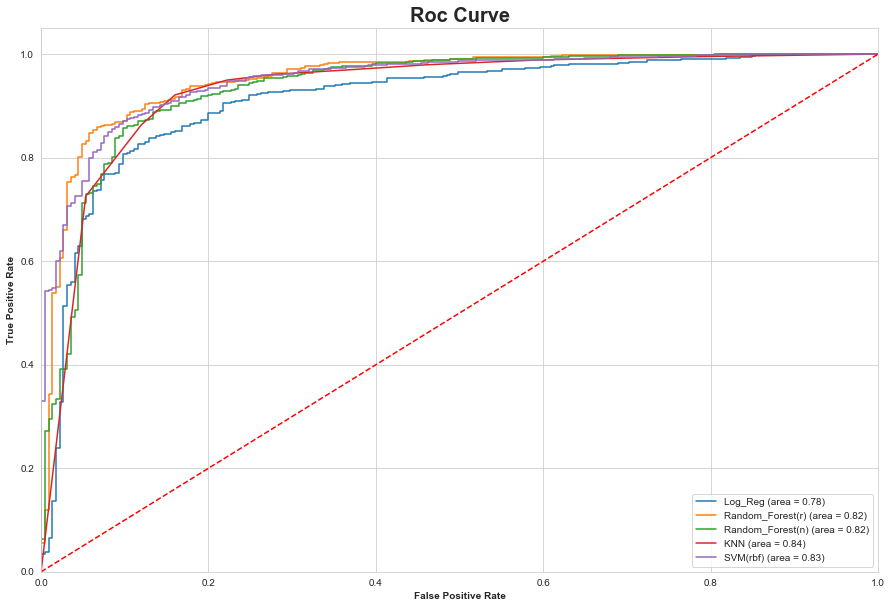

In [212]:
#ROC

fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, y_pred_prob_logreg[:, 1])
fpr_rforest_r, tpr_rforest_r, thresholds = roc_curve(y_test, y_pred_prob_rforest_r[:, 1])
fpr_rforest_n, tpr_rforest_n, thresholds = roc_curve(y_test, y_pred_prob_rforest_n[:, 1])
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob_knn[:, 1])
fpr_svm_rbf, tpr_svm_rbf, thresholds = roc_curve(y_test, y_pred_prob_svm_rbf[:, 1])


plt.figure(figsize=(15, 10))

plt.plot(fpr_logreg, tpr_logreg, label='Log_Reg (area = %0.2f)' % roc_score_logistic)
plt.plot(fpr_rforest_r, tpr_rforest_r, label='Random_Forest(r) (area = %0.2f)' % roc_score_rforest_r)
plt.plot(fpr_rforest_n, tpr_rforest_n, label='Random_Forest(n) (area = %0.2f)' % roc_score_rforest_n)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_score_knn)
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label='SVM(rbf) (area = %0.2f)' % roc_score_svm_rbf)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight="bold")
plt.ylabel('True Positive Rate', fontweight="bold")
plt.title('Roc Curve', fontweight="bold", fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [211]:
models_all = pd.DataFrame(
    data=["Logistic regression", "Random Forest (robust)", "Random Forest (normalize)", "KNN", "SVM(rbf)"], 
    columns=["Algorithms"])

accuracy_all = pd.DataFrame(
    data=[logreg_acc_score, random_forest_r_acc_score, random_forest_n_acc_score, knn_acc_score, svm_rbf_acc_score],
    columns=["Accuracy"])

precision_all = pd.DataFrame(
    data=[logreg_precision[0], random_forest_r_precision[0], random_forest_n_precision[0], knn_precision[0], svm_rbf_precision[0]],
    columns=["Precision"])

recall_all = pd.DataFrame(
    data=[logreg_recall[0], random_forest_r_recall[0], random_forest_n_recall[0], knn_recall[0], svm_rbf_recall[0]],
    columns=["Recall(TPR)"])

f1_all = pd.DataFrame(
    data=[logreg_f1[0], random_forest_r_f1[0], random_forest_n_f1[0], knn_f1[0], svm_rbf_f1[0]],
    columns=["F1 Score"])

roc_all = pd.DataFrame(
    data=[roc_score_logistic, roc_score_rforest_r, roc_score_rforest_n, roc_score_knn, roc_score_svm_rbf], 
    columns=["ROC Score"])

comparison_models = pd.concat([models_all, accuracy_all, precision_all, recall_all, f1_all, roc_all], axis=1)
comparison_models = comparison_models.sort_values(by=['Accuracy'], ascending=False)
comparison_models = pd.DataFrame(comparison_models)
comparison_models

,Algorithms,Accuracy,Precision,Recall(TPR),F1 Score,ROC Score
1,Random Forest (robust),92.01,0.881657,0.662222,0.756345,0.820865
3,KNN,91.59,0.810000,0.720000,0.762353,0.840533
4,SVM(rbf),91.26,0.806122,0.702222,0.750594,0.831644
2,Random Forest (normalize),91.09,0.817204,0.675556,0.739659,0.820360
0,Logistic regression,88.26,0.718750,0.613333,0.661871,0.779003
